In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.kernel_ridge import KernelRidge

In [4]:
df=pd.read_excel("database_new.xlsx")

NameError: name 'pd' is not defined

In [13]:
df.head()

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc,mac_organics
0,660,1.5,0,15.0,1.0,15.000000,15.000000,23.829600,2,0.0952,...,0.000389,0.003798,706.858347,0.000083,0.000083,2.750739e-07,0.003318,3.897000,3.897000,na
1,660,1.5,0,15.0,2.0,18.898816,18.898816,33.934547,2,0.0952,...,0.001005,0.008979,1122.067684,0.000173,0.000172,1.128127e-06,0.006529,4.047873,4.047873,na
2,660,1.5,0,15.0,3.0,21.633744,21.633744,41.730020,2,0.0952,...,0.001755,0.016226,1470.324613,0.000270,0.000267,2.579832e-06,0.009558,4.202000,4.202000,na
3,660,1.5,0,15.0,4.0,23.811016,23.811016,48.324498,2,0.0952,...,0.002516,0.022854,1781.171422,0.000362,0.000357,4.481784e-06,0.012386,4.212966,4.212966,na
4,660,1.5,0,15.0,5.0,25.649639,25.649639,54.149126,2,0.0952,...,0.003323,0.029703,2066.866345,0.000454,0.000447,6.867783e-06,0.015117,4.220137,4.220137,na


In [16]:
#df.isnull().sum()

In [2]:
X=df.loc[:,['wavelength','fractal_dimension', 'fraction_of_coating','primary_particle_size','number_of_primary_particles',
           'vol_equi_radius_outer', 'vol_equi_radius_inner','equi_mobility_dia']]
Y=df.loc[:,['q_abs','q_sca', 'g']]

NameError: name 'df' is not defined

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=np.random.randint(0,100))


NameError: name 'train_test_split' is not defined

In [45]:
lr = LinearRegression()

lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)

r2_score(Y_test,Y_pred)

0.8710516455398672

In [48]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,Y,scoring='r2'))

0.4822745174132142

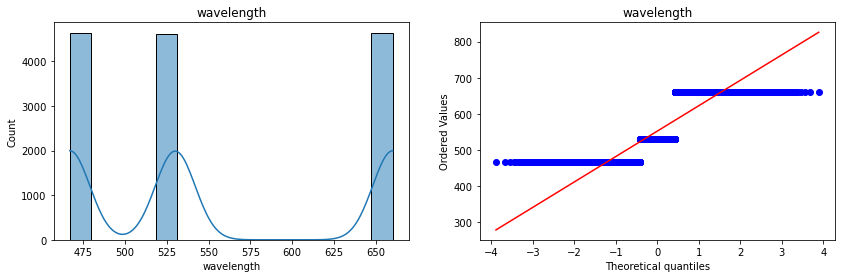

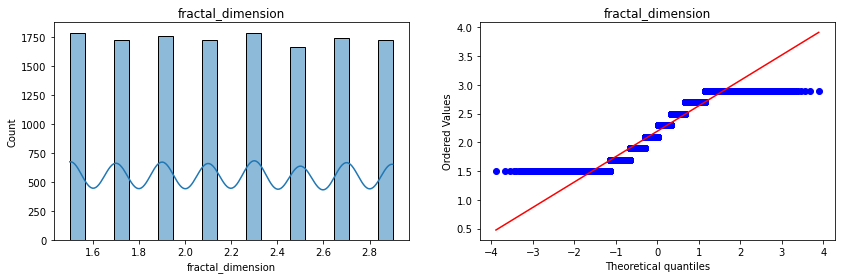

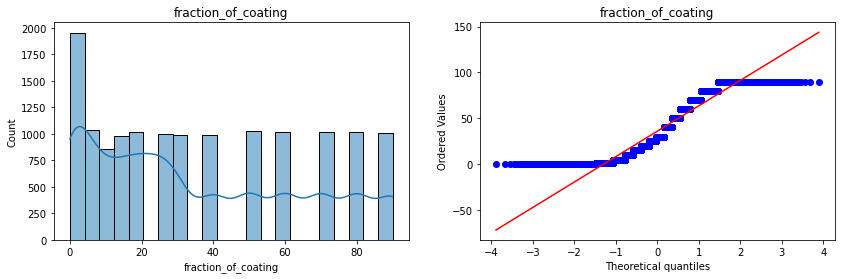

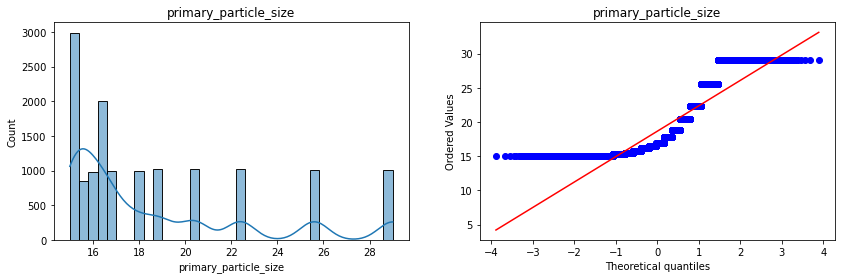

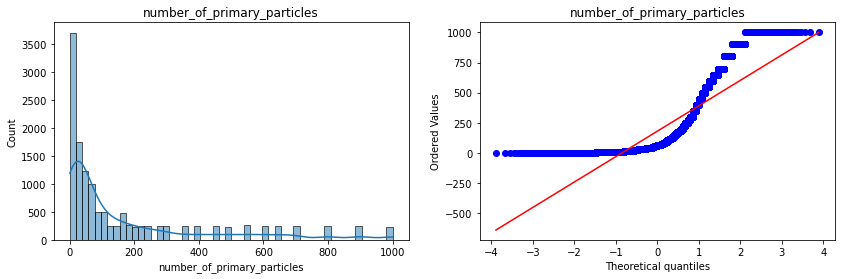

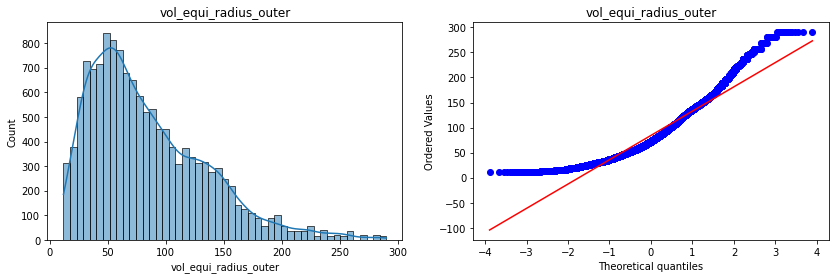

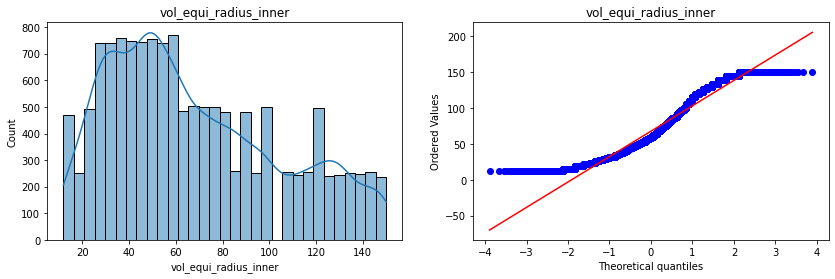

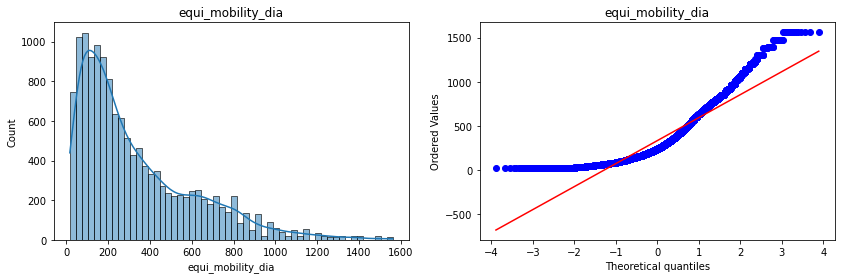

In [49]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [50]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,wavelength,-1.878161
1,fractal_dimension,0.701528
2,fraction_of_coating,0.323677
3,primary_particle_size,-3.420076
4,number_of_primary_particles,0.107440
5,vol_equi_radius_outer,0.208976
6,vol_equi_radius_inner,0.322320
7,equi_mobility_dia,0.175952


In [1]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,Y_train)

Y_pred2 = lr.predict(X_test_transformed)

r2_score(Y_test,Y_pred2)

NameError: name 'LinearRegression' is not defined

In [77]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,Y,scoring='neg_mean_absolute_error'))

-0.09854735245039939

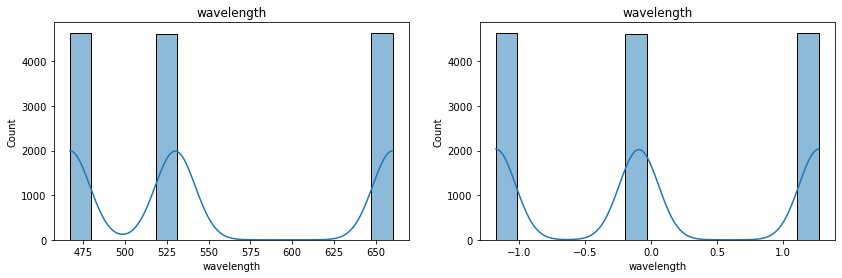

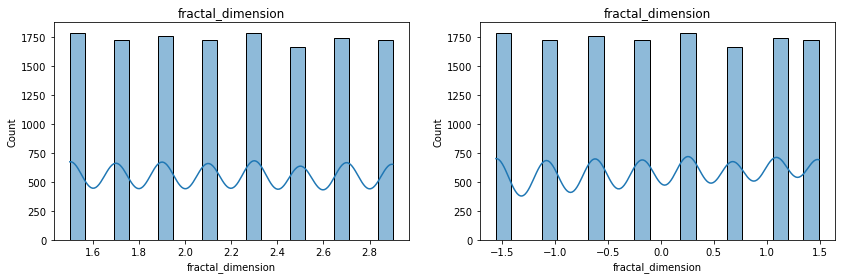

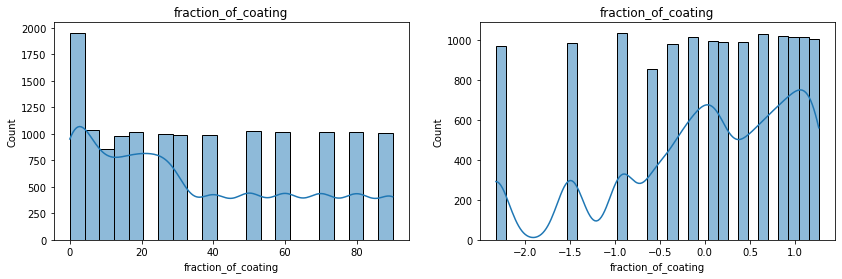

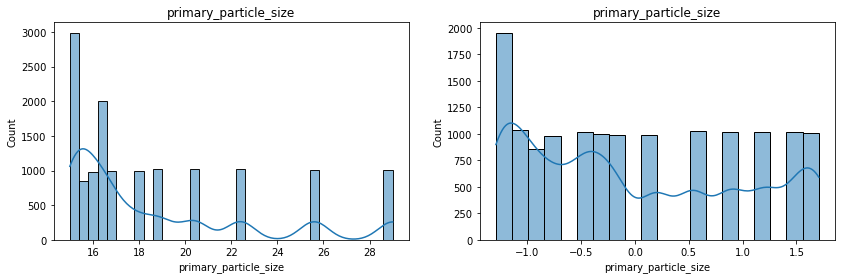

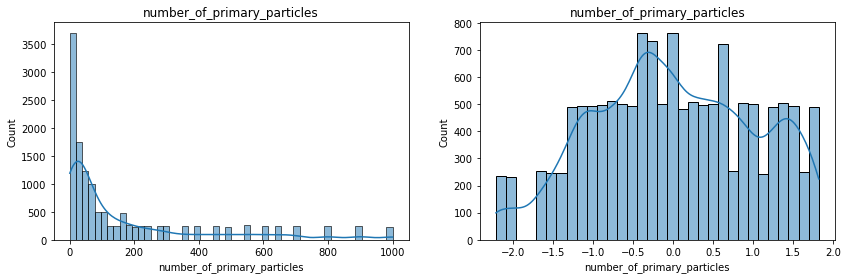

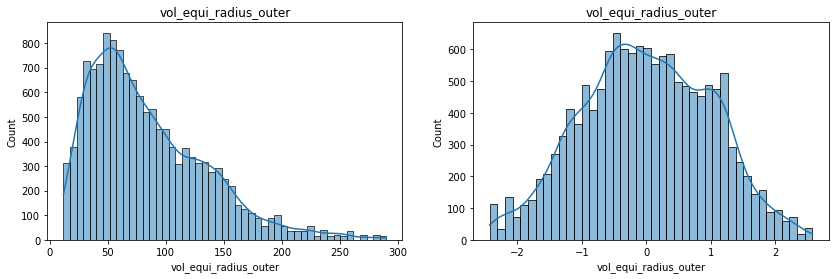

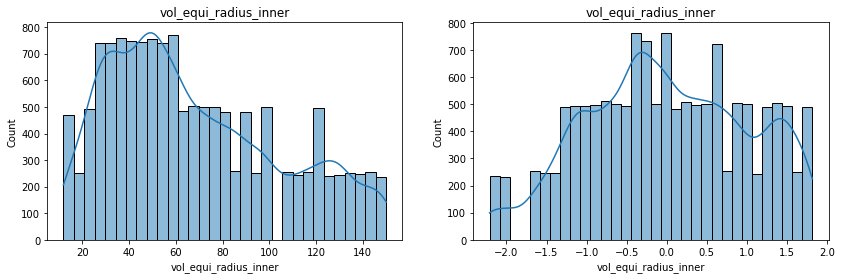

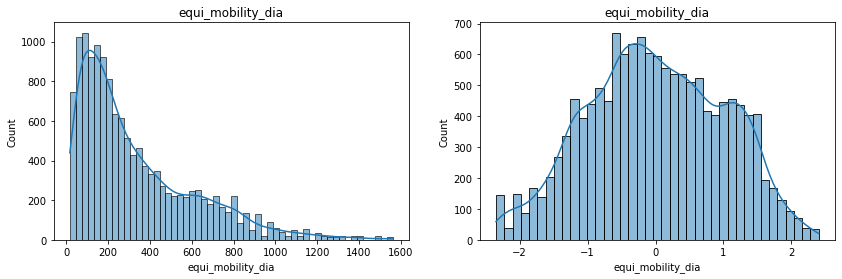

In [56]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(col)

    plt.show()

In [70]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,Y_train)

Y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(Y_test,Y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})
error = mean_absolute_error(Y_test, Y_pred3, multioutput='raw_values')
print(error)

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


0.782699737199914
[0.15033465 0.12995125 0.07396252]


In [58]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,Y,scoring='r2'))

0.5147354436632049

In [59]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

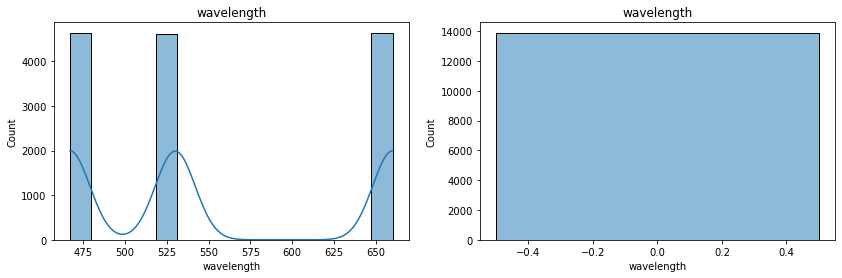

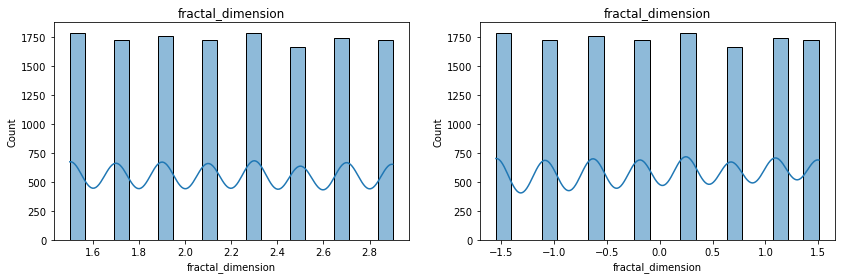

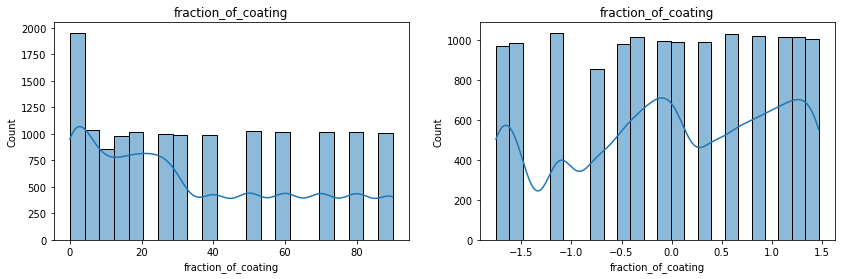

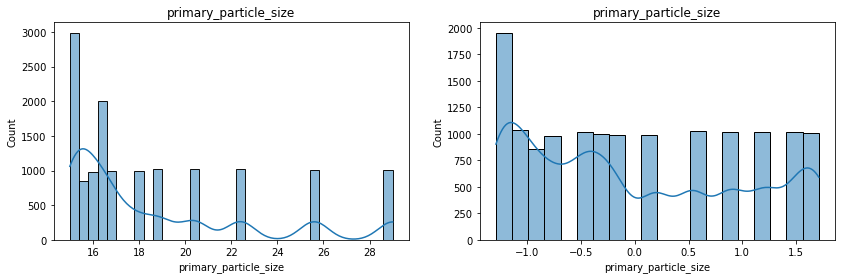

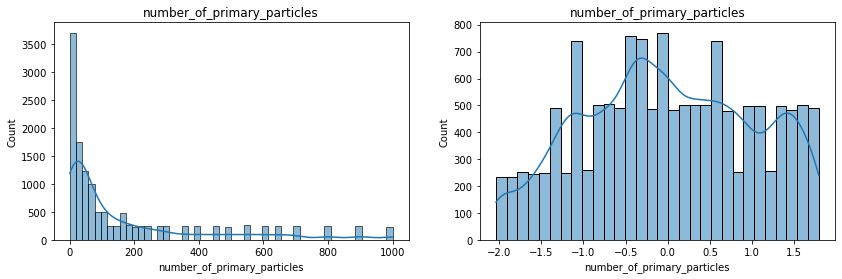

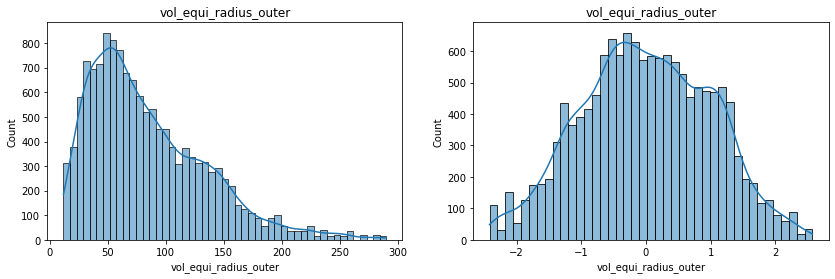

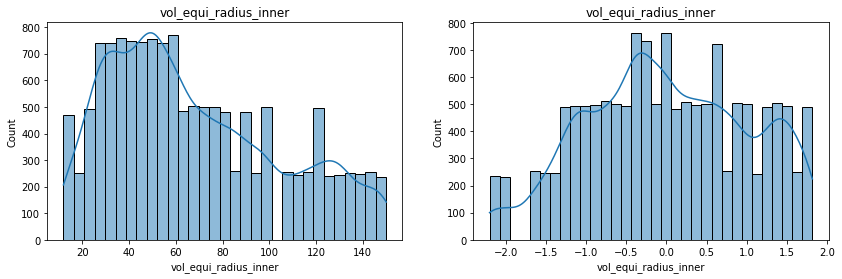

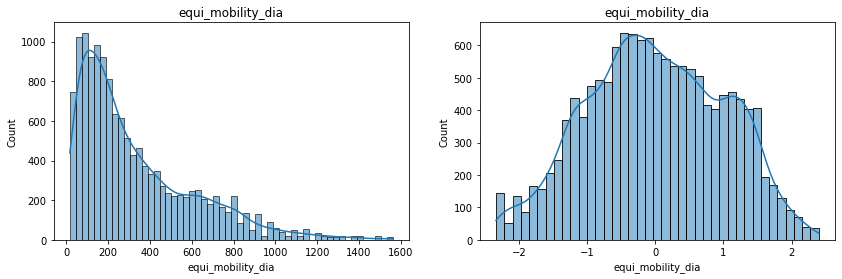

In [60]:

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(col)

    plt.show()

In [61]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,wavelength,-1.874935,-12.545030
1,fractal_dimension,0.664813,0.687417
2,fraction_of_coating,0.422453,0.423242
3,primary_particle_size,-3.664021,-3.627259
4,number_of_primary_particles,0.065905,0.065448
5,vol_equi_radius_outer,0.198759,0.196199
6,vol_equi_radius_inner,0.311007,0.309960
7,equi_mobility_dia,0.172374,0.170845


In [64]:
error = mean_absolute_error(Y_test, Y_pred3, multioutput='raw_values')

In [65]:
error

array([0.15033465, 0.12995125, 0.07396252])

In [73]:
regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train_transformed, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred4 = model.predict(X_test_transformed)
error = mean_absolute_error(Y_test, Y_pred4, multioutput='raw_values')

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


In [74]:
error

array([0.00245774, 0.00247096, 0.00511281])

In [78]:
np.mean(cross_val_score(model,X_transformed,Y,scoring='neg_mean_absolute_error'))

-0.0935499364449361